<a href="https://colab.research.google.com/github/ErnyBSB/clusteringForLibraries/blob/main/EmbeddingBERT_CDuTratada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0 IMPORTANDO E CRIANDO DATAFRAME

In [ ]:
#@title Bibliotecas básicas
import pandas as pd
import numpy as np

import kagglehub

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import RSLPStemmer

import matplotlib.pyplot as plt
import re

In [ ]:
# for pre processing
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# advise pandas error messages
pd.options.mode.chained_assignment = None  # default='warn'

In [ ]:
#@title Importa o DataSet do Kaggle

#import kagglehub
#ernestocarlosbode_books_metadata_with_topics_path = kagglehub.dataset_download('ernestocarlosbode/books-metadata')


ernestocarlosbode_books_metadata_path = kagglehub.dataset_download('ernestocarlosbode/books-metadata')


print('Data source import complete.')
print(ernestocarlosbode_books_metadata_path)

!ls /root/.cache/kagglehub/datasets/ernestocarlosbode/books-metadata/versions/1

100%|██████████| 7.43M/7.43M [00:00<00:00, 9.81MB/s]

Extracting files...


Data source import complete.
/root/.cache/kagglehub/datasets/ernestocarlosbode/books-metadata/versions/1
df_short_livro.csv


In [ ]:
#@title Criando o DataFrame df
file_path = f'{ernestocarlosbode_books_metadata_path}/df_short_livro.csv' #<< nome do arquivo no Kaggle
df = pd.read_csv(file_path, sep=';')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182811 entries, 0 to 182810
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   autor        142237 non-null  object 
 1   título       182811 non-null  object 
 2   imprenta     182801 non-null  object 
 3   material     182811 non-null  object 
 4   coleção      0 non-null       float64
 5   localização  181799 non-null  object 
 6   descrição    37850 non-null   object 
 7   data tombo   179624 non-null  object 
 8   exemplar     7015 non-null    object 
dtypes: float64(1), object(8)
memory usage: 12.6+ MB


# 1 PRÉ-PROCESSAMENTO






In [ ]:
#@title Renomeando colunas com nomes mais curtos

df = df.rename(columns={
    'autor': 'author',
    'título': 'title',
    'imprenta': 'publish',
    'material': 'type',
    'coleção': 'collection',
    'localização': 'CDU',
    'descrição': 'description',
    'data tombo': 'dt_load',
    'exemplar': 'copies'
})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182811 entries, 0 to 182810
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   author       142237 non-null  object 
 1   title        182811 non-null  object 
 2   publish      182801 non-null  object 
 3   type         182811 non-null  object 
 4   collection   0 non-null       float64
 5   CDU          181799 non-null  object 
 6   description  37850 non-null   object 
 7   dt_load      179624 non-null  object 
 8   copies       7015 non-null    object 
dtypes: float64(1), object(8)
memory usage: 12.6+ MB


In [ ]:
#@title Dataframe sem títulos repetidos

df_unique = df.drop_duplicates(subset=['title'])

df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131296 entries, 0 to 182810
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   author       102164 non-null  object 
 1   title        131296 non-null  object 
 2   publish      131288 non-null  object 
 3   type         131296 non-null  object 
 4   collection   0 non-null       float64
 5   CDU          130457 non-null  object 
 6   description  12205 non-null   object 
 7   dt_load      128783 non-null  object 
 8   copies       1994 non-null    object 
dtypes: float64(1), object(8)
memory usage: 10.0+ MB


In [ ]:
#@title Pré-Processamento: acrescentar coluna Class_CDU
#(para definição da Classe operacional, ou de trabalho)


def extract_first_digit(text):
  if pd.isna(text) or not isinstance(text, str):
    return None
  match = re.search(r'\d', text)
  if match:
    return match.group(0)
  else:
    return None

df_unique['Class_CDU'] = df['CDU'].apply(extract_first_digit)

df_unique.info()


<class 'pandas.core.frame.DataFrame'>
Index: 131296 entries, 0 to 182810
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   author       102164 non-null  object 
 1   title        131296 non-null  object 
 2   publish      131288 non-null  object 
 3   type         131296 non-null  object 
 4   collection   0 non-null       float64
 5   CDU          130457 non-null  object 
 6   description  12205 non-null   object 
 7   dt_load      128783 non-null  object 
 8   copies       1994 non-null    object 
 9   Class_CDU    130457 non-null  object 
dtypes: float64(1), object(9)
memory usage: 11.0+ MB


In [ ]:
#@title  coluna df_unique
# cópia da coluna df_unique['CDU'] mas removendo todos os caracteres não núméricos (a-z) (A-Z)

def remove_non_numeric(text):
  if pd.isna(text) or not isinstance(text, str):
    return text
  return re.sub(r'[^0-9]', '', text)

df_unique['CDU_clean'] = df_unique['CDU'].apply(remove_non_numeric)

# 2 TRATAMENTO CDU

In [ ]:
#@title cria o dicionário cdu_dic com chave e valor
"""
dicionário apenas para a classe 9 CDU, com descrições relativas
às áreas mais altas na hierarquia (não está completa)
"""
cdu_dic1 = {
    '902': 'Arqueologia',
    '903': 'Pré-História; Restos, artefatos e relíquias pré-históricas',
    '904': 'Restos culturais dos tempos históricos',
    '908': 'Estudos de área; Estudo de uma localidade',
    '910': 'Questões gerais; Geografia como ciência; Exploração; Viagens',
    '911': 'Geografia Geral; Geografia Sistemática; Geografia Teórica',
    '912': 'Representações não textuais, de uma região',
    '913': 'Geografia regional em geral; Geografia do mundo antigo',
    '929': 'Estudos biográficos; genealógicos; heráldicos',
    '93/94': 'História',
    '930': 'Ciência da História; Ciências auxiliares da História',
    '94(41/99)': 'História dos Países'
}


cdu_dic = {
    # Classe Principal
    "9": "GEOGRAFIA. BIOGRAFIA. HISTÓRIA.",

    # 90 - Arqueologia, Pré-história, História Local
    "90": "Arqueologia. Pré-história. Estudos de História Local",
    "902": "Arqueologia",
    "902.2": "Métodos arqueológicos. Escavações",
    "902.6": "Achados arqueológicos (tipos)",
    "903": "Pré-história. Vestígios pré-históricos, artefatos",
    # "903'1": "Períodos pré-históricos (Paleolítico, Neolítico, etc.)", # Exemplo com auxiliar, opcional incluir
    "903.2": "Ferramentas, armas pré-históricas",
    "903.4": "Assentamentos, habitações pré-históricas",
    "903.5": "Túmulos, ritos funerários pré-históricos",
    "904": "Vestígios culturais de tempos históricos (Arqueologia de períodos históricos)",
    "908": "Estudos de uma localidade (Monografias regionais/locais abrangentes)",

    # 91 - Geografia, Exploração, Viagens
    "91": "Geografia. Exploração. Viagens.",
    "910": "Geografia como ciência. Exploração geral. Viagens.",
    "910.1": "Teoria e metodologia da geografia",
    "910.4": "Expedições, viagens de descoberta",
    "911": "Geografia Geral (Sistemática)",
    "911.2": "Geografia física",
    "911.3": "Geografia humana (Antropogeografia)",
    "911.3:314": "Geografia da população (Demogeografia)", # Exemplo de combinação
    "911.37": "Geografia dos assentamentos (urbana, rural)",
    "911.5/.9": "Geografia Regional (Teoria), Tipos de paisagem, Geografia aplicada",
    "912": "Representações não-textuais de uma região (Mapas, Atlas, Globos, etc.)",
    "913/919": "Geografia Regional (Geografia de lugares específicos)", # Indica a faixa geral
    # Exemplos de abordagem moderna (não são códigos base, mas ilustram a aplicação)
    # "91(4)": "Geografia da Europa",
    # "91(8)": "Geografia da América do Sul",
    # "91(81)": "Geografia do Brasil",
    # "91(813.1)": "Geografia da Bahia",
    # Estrutura antiga/alternativa (ainda existente)
    "913": "Geografia do Mundo Antigo",
    "914": "Geografia da Europa",
    "915": "Geografia da Ásia",
    "916": "Geografia da África",
    "917": "Geografia da América do Norte",
    "918": "Geografia da América do Sul",
    "918.1": "Geografia do Brasil", # Exemplo dentro da estrutura antiga
    "919": "Geografia da Oceania, Regiões Polares, outros mundos",

    # 92 - Biografia
    "92": "Biografia", # Código geral, mas 929 é mais usado
    "929": "Estudos biográficos",
    # Exemplos de aplicação (não códigos base)
    # "929(81)": "Biografias de brasileiros",
    # "929:78": "Biografias de músicos",

    # 93/94 - História
    "93/94": "História", # Faixa geral
    "930": "Ciência da História. Historiografia. Ciências auxiliares da história.",
    "930.1": "Teoria e filosofia da história",
    "930.2": "Metodos e ciências auxiliares da história (Paleografia, Diplomática, Heráldica, Genealogia, etc.)",
    "930.25": "Arquivística. Arquivos.",
    "930.85": "História da civilização. História cultural.",
    "931/939": "História do Mundo Antigo", # Faixa geral
    "931": "Mundo Antigo em geral",
    "932": "Egito Antigo",
    "937": "Roma Antiga",
    "938": "Grécia Antiga",
    "94": "História Geral (por lugar e período - Base principal para história)",
    # Exemplos de aplicação com auxiliares (não códigos base isolados)
    # "94(100)": "História Mundial",
    # "94(100)\"1914/1918\"": "História da Primeira Guerra Mundial",
    # "94(3)": "História do Mundo Antigo",
    # "94(4)": "História da Europa",
    # "94(4)\"04/14\"": "História da Europa na Idade Média",
    # "94(8)": "História da América do Sul",
    # "94(81)": "História do Brasil",
    # "94(81)\"1500/1822\"": "História do Brasil Colônia",
    # "94(81)\"1822/1889\"": "História do Brasil Império",
    # "94(81)\"1985/...\"": "História do Brasil (Nova República em diante)",
    # "94(81):33": "História econômica do Brasil",

    "95/99": "História por Continente/País (Estrutura Geográfica Primária)", # Faixa geral
    "950": "História da Ásia",
    "960": "História da África",
    "970": "História da América do Norte",
    "980": "História da América do Sul",
    "981": "História do Brasil", # Exemplo dentro desta estrutura
    "990": "História da Oceania, Regiões Polares",
}

In [ ]:
#@title Aplica o dicionário para localizar áreas correspondentes (texto)
"""
esta coluna será preenchida com o dicionário CDU anterior
"""
df_unique['CDU_area'] = "sID"

# 1. Obter as chaves do dicionário e ordená-las por comprimento, da mais longa para a mais curta.
#    Isso garante que encontraremos a correspondência mais específica primeiro.
sorted_cdu_keys = sorted(cdu_dic.keys(), key=len, reverse=True)

# 2. Definir uma função que encontra a área correspondente para um único código CDU
def map_cdu_to_area(cdu_code):
    """
    Verifica um código CDU em relação às chaves ordenadas do dicionário
    e retorna o valor da primeira chave correspondente (a mais longa).
    """
    # Garante que estamos trabalhando com uma string e lida com valores ausentes (NaN, None)
    if not isinstance(cdu_code, str):
        return np.nan # Ou None, ou "", dependendo do que preferir para não encontrados

    # Itera pelas chaves ordenadas (da mais longa para a mais curta)
    for key in sorted_cdu_keys:
        if cdu_code.startswith(key):
            # Encontrou a correspondência mais longa (primeira encontrada nesta ordem)
            return cdu_dic[key] # Retorna o valor do dicionário para essa chave

    # Se o loop terminar sem encontrar nenhuma correspondência
    return np.nan # Ou None, ou "", etc.

# 3. Aplicar a função à coluna 'CDU' do DataFrame para preencher a coluna 'cdu_area'
df_unique['CDU_area'] = df_unique['CDU'].apply(map_cdu_to_area)


In [ ]:
df_unique[['CDU','Class_CDU', 'CDU_area','CDU_clean']]

,CDU,Class_CDU,CDU_area,CDU_clean
0,918.153 MAYA-RO FLORE,9,Geografia do Brasil,918153
1,869.0(81) AMADO-J TENDA,8,NaN,869081
2,972.93 MALIN-J VERDA,9,GEOGRAFIA. BIOGRAFIA. HISTÓRIA.,97293
3,869.0(81) LIMA-J ANTOL,8,NaN,869081
4,840 BEAUV-S MANDA,8,NaN,840
...,...,...,...,...
182805,869.0(81) JESUS-CM QUART 9.REIMPR.,8,NaN,8690819
182806,17 ETICA-PV ETICA 6.IMPR.,1,NaN,176
182807,342.7:37 EDUCA-DH EDUCA,3,NaN,342737
182808,347.98 CARVA-FB LEGIT,3,NaN,34798


In [ ]:
#@title PRÉ-PROCESSAMENTO FINAL: função preprocess_text

def preprocess_text(text):
    if not isinstance(text, str):
        return ""  # or handle non-string values as needed

    text = re.sub(r'[^\w\s]', '', text) # Remove pontuação
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('portuguese'))
    tokens = [w for w in tokens if not w in stop_words]
    stemmer = RSLPStemmer()
    stemmed_tokens = [stemmer.stem(w) for w in tokens]
    return " ".join(stemmed_tokens)

# aplicando pré-processamento nas colunas de embeddings
df_unique['title_processed'] = df_unique['title'].apply(preprocess_text)
df_unique['CDU_clean_processed'] = df_unique['CDU_clean'].apply(preprocess_text)
df_unique['CDU_area_processed'] = df_unique['CDU_area'].apply(preprocess_text)

# 3 SLICES DATAFRAME POR CLASSES



In [ ]:
"""
Esta seção cria fatias (slices) do dataframe maior.. a fim
de otimizar o processamento e focar as análises em classes
CDU específicas (cada slice corresponde a uma das classes CDU
utilizadas no acervo)
"""

In [ ]:
#@title Classes CDU no DataFrame df

# Display and count unique values in the 'coleção' column, excluding NaN values
unique_classes = df_unique['Class_CDU'].dropna().unique()
print(unique_classes)
print("\nNumber of unique values:", len(unique_classes))


['9' '8' '1' '3' '0' '6' '2' '5' '7']

Number of unique values: 9


In [ ]:
#@title DataFrames Slice's para cada classe CDU

# Loop through unique collections
for classe in unique_classes:
    # Slice the DataFrame for the current class
    df_slice = df_unique[df_unique['Class_CDU'] == classe]

    # Create a new DataFrame with the name df_slice_{collection}
    globals()[f'df_slice_{classe}'] = df_slice

# mostrando os dataframes slices por classe CDU
all_objects = dir()
df_slice_objects = [obj for obj in all_objects if obj.startswith("df_slice_")]
df_slice_objects


['df_slice_0',
 'df_slice_1',
 'df_slice_2',
 'df_slice_3',
 'df_slice_5',
 'df_slice_6',
 'df_slice_7',
 'df_slice_8',
 'df_slice_9']

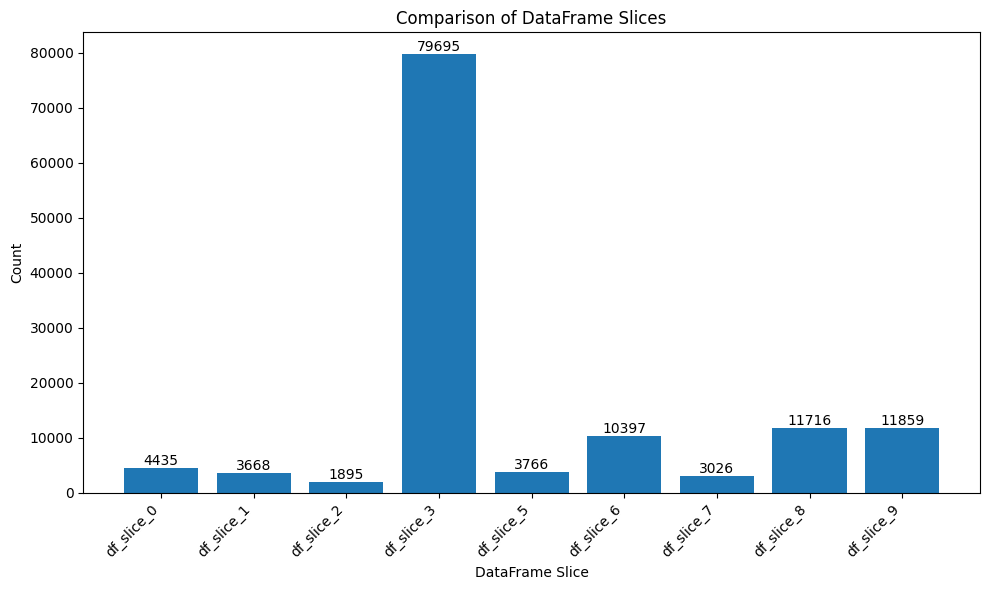

In [ ]:
import matplotlib.pyplot as plt

# Create a list to store the counts for each DataFrame
counts = []

# Iterate over each df_slice object
for obj_name in df_slice_objects:
  # Get the DataFrame using globals()
  df_slice = globals()[obj_name]

  # Count the number of rows (or any relevant metric)
  counts.append(len(df_slice))

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
bars = plt.bar(df_slice_objects, counts)

# Add labels above the bars with their values
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.xlabel("DataFrame Slice")
plt.ylabel("Count")
plt.title("Comparison of DataFrame Slices")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


In [ ]:
#@title Classe CDU para trabalho (trabalho uma classe por vez)
"""
aqui escolhemos uma das classes do DataFrame df_slice_objects. Isto é necessário
em função da quantidade total de linhas ser muito alta.
Trabalhando com uma classe por vez, minimizamos este problema.
"""

df_chosenClass = df_slice_9 #@param < classe escolhida

print('Número total de títulos (únicos) nesta classe >> ', len(df_chosenClass.title))
print("-" * 20)
#print(f'Classe Escolhida: {class_folder}')
print("-" * 20)
df_chosenClass.info()

Número total de títulos (únicos) nesta classe >>  11859
--------------------
--------------------
<class 'pandas.core.frame.DataFrame'>
Index: 11859 entries, 0 to 182803
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   author               10222 non-null  object 
 1   title                11859 non-null  object 
 2   publish              11858 non-null  object 
 3   type                 11859 non-null  object 
 4   collection           0 non-null      float64
 5   CDU                  11859 non-null  object 
 6   description          1624 non-null   object 
 7   dt_load              11686 non-null  object 
 8   copies               456 non-null    object 
 9   Class_CDU            11859 non-null  object 
 10  CDU_clean            11859 non-null  object 
 11  CDU_area             11858 non-null  object 
 12  title_processed      11859 non-null  object 
 13  CDU_clean_processed  11859 non-null  objec

# 4 EMBEDDING BERT models

In [ ]:
!pip install transformers sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 129.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 104.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 116.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvji

In [ ]:
#@title Escolha e inicialização do modelo para Embeddings

from sentence_transformers import SentenceTransformer
import torch

#model_name = 'sentence-transformers/all-MiniLM-L6-v2'
model_name = 'sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2'
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Initialize the SentenceTransformer model with specified parameters
model = SentenceTransformer(model_name, device=device)

model

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.89k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
)

In [ ]:
#@title Cálculo dos Embeddings para cada coluna do DataFrame

# Calculate embeddings com model
df_chosenClass['title_embeddings'] = df_chosenClass['title_processed'].apply(lambda x: model.encode(x))

# Calculate embeddings com model
df_chosenClass['CDU_clean_embeddings'] = df_chosenClass['CDU_clean_processed'].apply(lambda x: model.encode(x))

# Calculate embeddings com model
df_chosenClass['CDU_area_embeddings'] = df_chosenClass['CDU_area_processed'].apply(lambda x: model.encode(x))

In [ ]:
df_chosenClass.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11859 entries, 0 to 182803
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author                10222 non-null  object 
 1   title                 11859 non-null  object 
 2   publish               11858 non-null  object 
 3   type                  11859 non-null  object 
 4   collection            0 non-null      float64
 5   CDU                   11859 non-null  object 
 6   description           1624 non-null   object 
 7   dt_load               11686 non-null  object 
 8   copies                456 non-null    object 
 9   Class_CDU             11859 non-null  object 
 10  CDU_clean             11859 non-null  object 
 11  CDU_area              11858 non-null  object 
 12  title_processed       11859 non-null  object 
 13  CDU_clean_processed   11859 non-null  object 
 14  CDU_area_processed    11859 non-null  object 
 15  title_embeddings      1

In [ ]:
#@title SALVANDO DF_UNIQUE COM EMBEDDINGS
"""
USAR CASO SEJA NECESSÁRIO SALVAR O DF_UNIQUE COM EMBEDDINGS
"""
"""
from google.colab import drive
drive.mount('/content/drive')

# Assuming df_unique is already defined as in your provided code.
df_unique.to_csv('[DEFINIR LOCAL PARA SALVAR O ARQUIVO]/df_uniqueall-paraphrase-multilingual.csv', sep=';', encoding='utf-8', index=False)
"""

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n\n# Assuming df_unique is already defined as in your provided code.\ndf_unique.to_csv('[DEFINIR LOCAL PARA SALVAR O ARQUIVO]/df_uniqueall-paraphrase-multilingual.csv', sep=';', encoding='utf-8', index=False)\n"

# 5 CLUSTERIZAÇÃO (em df_chosenClass)


---



In [ ]:
#@title PONDERAÇÃO DE FEATURES NOS EMBEDDINGS

w_t = 0.1 #title
w_c = 0.3 #cdu_clean
w_a = 0.6 #cdu_area

df_chosenClass['combined_embedding'] = [
    (w_t * title_emb + w_c * cdu_emb + w_a * area_emb)
    for title_emb, cdu_emb, area_emb
    in zip(df_chosenClass['title_embeddings'],
           df_chosenClass['CDU_clean_embeddings'],
           df_chosenClass['CDU_area_embeddings'])
]

In [ ]:
#@title APLICAÇÃO CLUSTERIZAÇÃO com K-means++

from sklearn.cluster import KMeans

# Cria o objeto kmeans
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=0)

# A coluna 'cluster' recebe o número do cluster
df_chosenClass['cluster'] = kmeans.fit_predict(np.stack(df_chosenClass['combined_embedding']))


# 6 GRÁFICOS VISUALIZAÇÃO



In [ ]:
!pip install umap-learn

In [ ]:
#@title Bibliotecas gráficos

import umap
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from sklearn.manifold import TSNE

import plotly.express as px

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


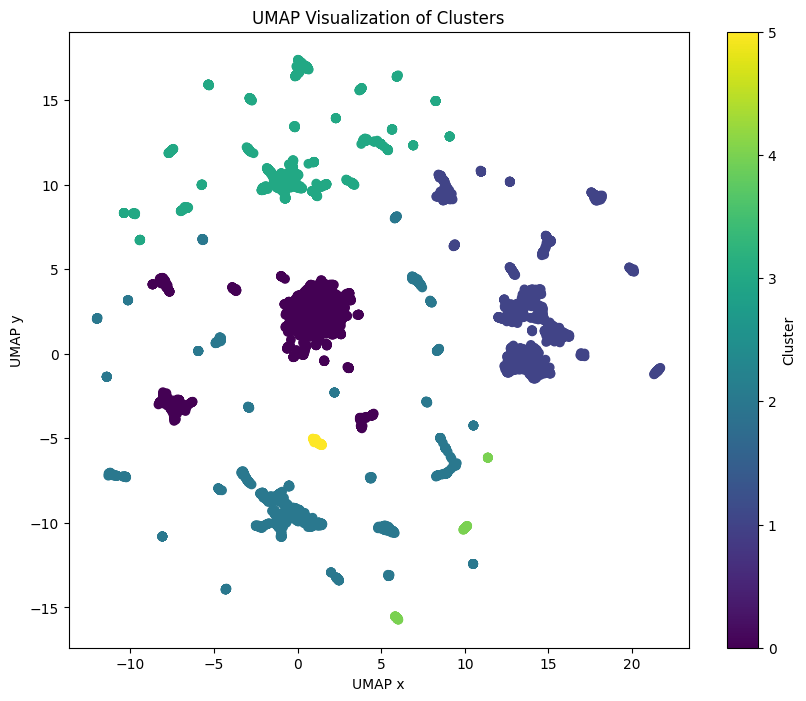

In [ ]:
#@title UMAP 2D

# Reduce dimensionality to 2D using UMAP
reducer = umap.UMAP(n_components=2, random_state=42)  # You can adjust parameters as needed
embedding = reducer.fit_transform(np.stack(df_chosenClass['combined_embedding']))

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=df_chosenClass['cluster'])
plt.xlabel('UMAP x')
plt.ylabel('UMAP y')
plt.title('UMAP Visualization of Clusters')
plt.colorbar(label='Cluster')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


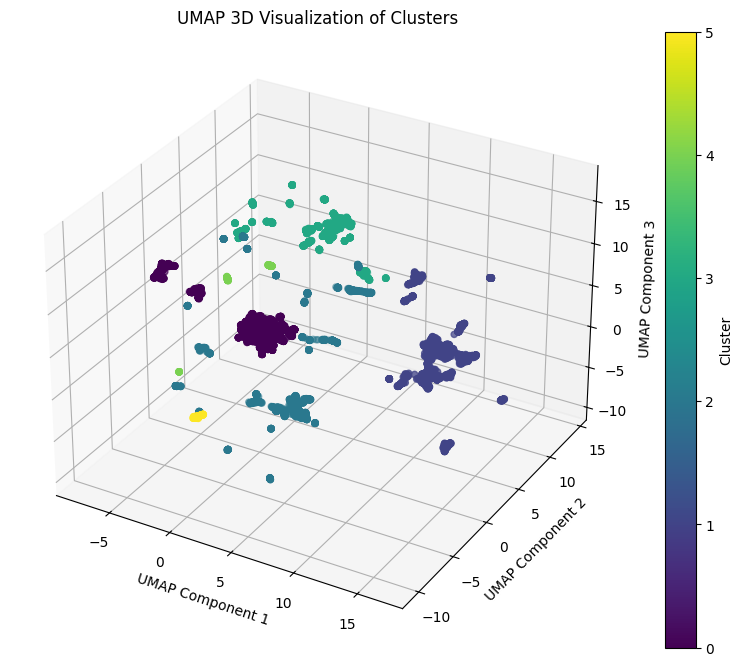

In [ ]:
#@title UMAP 3D

# Reduce dimensionality to 3D using UMAP
reducer = umap.UMAP(n_components=3, random_state=42)
embedding_3d = reducer.fit_transform(np.stack(df_chosenClass['combined_embedding']))

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(embedding_3d[:, 0], embedding_3d[:, 1], embedding_3d[:, 2], c=df_chosenClass['cluster'])

ax.set_xlabel('UMAP Component 1')
ax.set_ylabel('UMAP Component 2')
ax.set_zlabel('UMAP Component 3')
ax.set_title('UMAP 3D Visualization of Clusters')

# Add a colorbar
fig.colorbar(scatter, label='Cluster')
plt.show()


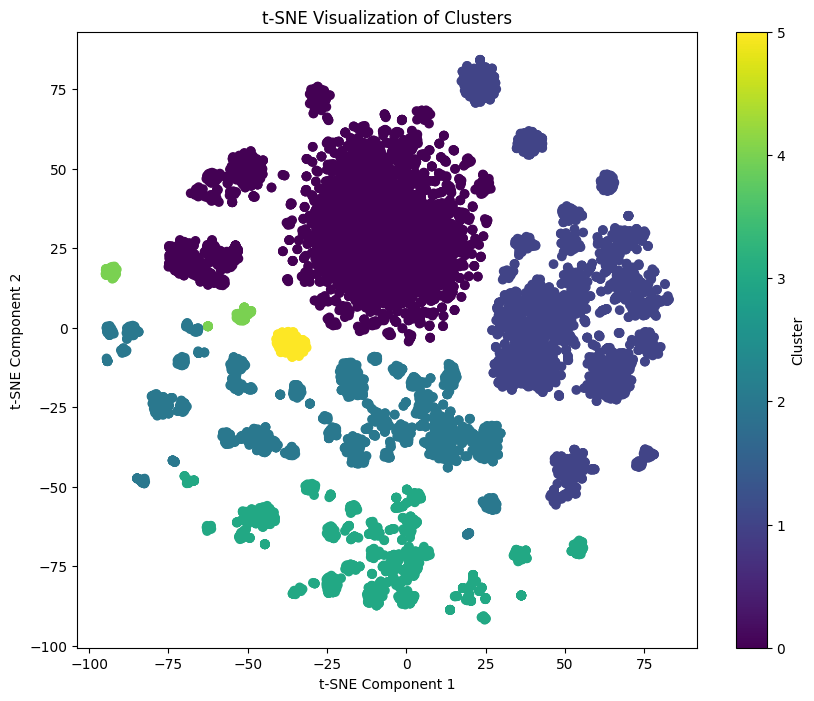

In [ ]:
#@title t-SNE 2D

# Use TSNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=0)
tsne_result = tsne.fit_transform(np.stack(df_chosenClass['combined_embedding']))

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=df_chosenClass['cluster'])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Clusters')
plt.colorbar(label='Cluster')
plt.show()


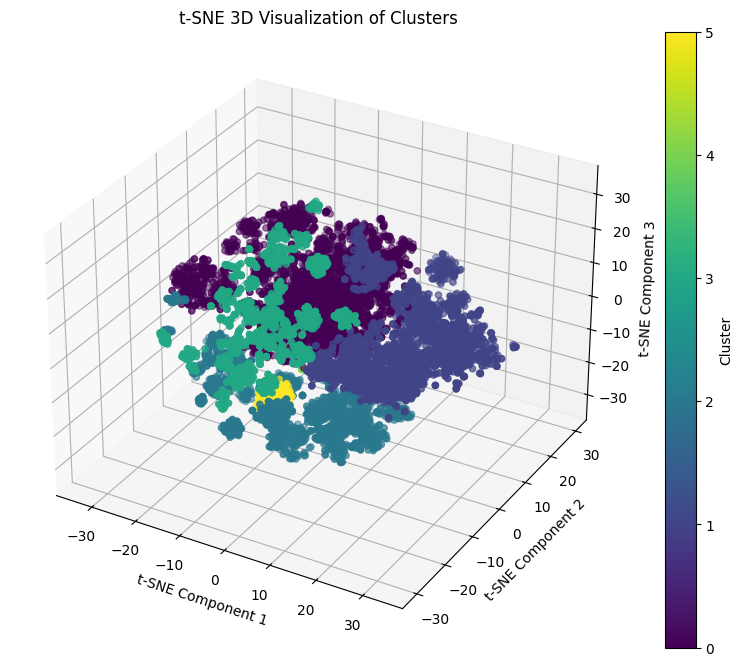

In [ ]:
#@title t-SNE 3D
# Use TSNE to reduce dimensionality to 3D
tsne = TSNE(n_components=3, random_state=0)
tsne_result = tsne.fit_transform(np.stack(df_chosenClass['combined_embedding']))

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(tsne_result[:, 0], tsne_result[:, 1], tsne_result[:, 2], c=df_chosenClass['cluster'])

ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.set_title('t-SNE 3D Visualization of Clusters')

# Add a colorbar
fig.colorbar(scatter, label='Cluster')
plt.show()


In [ ]:
#@title t-SNE interativo

fig = px.scatter_3d(
    x=tsne_result[:, 0],
    y=tsne_result[:, 1],
    z=tsne_result[:, 2],
    color=df_chosenClass['cluster'],
    title='Interactive t-SNE 3D Visualization of Clusters',
    labels={'x': 't-SNE x', 'y': 't-SNE y', 'z': 't-SNE z', 'color': 'Cluster'}
)

fig.update_traces(marker=dict(size=7)) # Adjust marker size if needed
fig.show()


# 7 LIMITES FORA CENTRÓIDES

In [ ]:
#@title Remoção pontos externos a cada cluster

# 1. Obter os embeddings como um array NumPy (se ainda não tiver)
X_embeddings = np.stack(df_chosenClass['combined_embedding'].values)

# 2. Obter os centroides
centroids = kmeans.cluster_centers_

# 3. Calcular a distância de cada ponto ao *seu* centroide atribuído
#    Podemos usar kmeans.transform, que calcula a distância de cada ponto a TODOS os centroides.
#    Depois, selecionamos a distância ao centroide específico do cluster do ponto.
distances_to_all_centroids = kmeans.transform(X_embeddings)

distances_to_assigned_centroid = np.zeros(X_embeddings.shape[0])
for i, label in enumerate(df_chosenClass['cluster']):
    distances_to_assigned_centroid[i] = distances_to_all_centroids[i, label]

# Adicionar a distância ao DataFrame para facilitar
df_chosenClass['distance_to_centroid'] = distances_to_assigned_centroid

# 4. Definir o critério de corte (ex: manter os 90% mais próximos em cada cluster)
percentile_to_keep = 70
indices_to_keep = []

# 5. Filtrar os dados para cada cluster
for cluster_id in range(kmeans.n_clusters):
    # Selecionar os dados apenas para o cluster atual
    cluster_data = df_chosenClass[df_chosenClass['cluster'] == cluster_id]

    if not cluster_data.empty:
        # Calcular a distância limite (o percentil escolhido) para este cluster
        distance_threshold = np.percentile(cluster_data['distance_to_centroid'], percentile_to_keep)

        # Obter os índices originais dos pontos neste cluster que estão DENTRO do limite
        indices_in_cluster_to_keep = cluster_data[cluster_data['distance_to_centroid'] <= distance_threshold].index
        indices_to_keep.extend(indices_in_cluster_to_keep)

# 6. Criar um novo DataFrame contendo apenas os pontos "internos"
df_filtered_clusters = df_chosenClass.loc[indices_to_keep].copy()

# df_filtered_clusters contém apenas os pontos que não foram considerados "externos"
print(f"Número original de pontos: {len(df_chosenClass)}")
print(f"Número de pontos após remover a parte externa (mantendo {percentile_to_keep}% mais próximos por cluster): {len(df_filtered_clusters)}")



Número original de pontos: 11859
Número de pontos após remover a parte externa (mantendo 70% mais próximos por cluster): 8300


In [ ]:
df_filtered_clusters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8300 entries, 20 to 181123
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author                7264 non-null   object 
 1   title                 8300 non-null   object 
 2   publish               8300 non-null   object 
 3   type                  8300 non-null   object 
 4   collection            0 non-null      float64
 5   CDU                   8300 non-null   object 
 6   description           1188 non-null   object 
 7   dt_load               8170 non-null   object 
 8   copies                372 non-null    object 
 9   Class_CDU             8300 non-null   object 
 10  CDU_clean             8300 non-null   object 
 11  CDU_area              8300 non-null   object 
 12  title_processed       8300 non-null   object 
 13  CDU_clean_processed   8300 non-null   object 
 14  CDU_area_processed    8300 non-null   object 
 15  title_embeddings      8

In [ ]:
#@title Qtas linhas removidas em cada cluster
print(df_chosenClass['cluster'].value_counts())
print(df_filtered_clusters['cluster'].value_counts())

cluster
0    4341
1    3220
2    2413
3    1572
5     168
4     145
Name: count, dtype: int64
cluster
0    3039
1    2254
2    1689
3    1100
5     117
4     101
Name: count, dtype: int64


# 8 GRÁFICOS após EXTERNOS CENTRÓIDES




In [ ]:
#@title Bibliotecas gráficos

import umap
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from sklearn.manifold import TSNE

import plotly.express as px

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



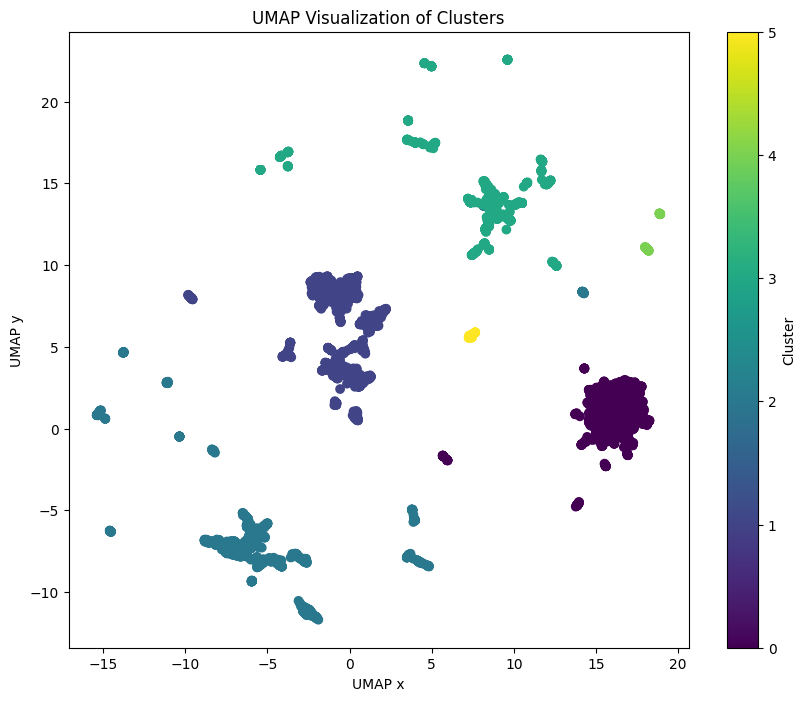

In [ ]:
#@title UMAP 2D

# Reduce dimensionality to 2D using UMAP
reducer = umap.UMAP(n_components=2, random_state=42)  # You can adjust parameters as needed
embedding = reducer.fit_transform(np.stack(df_filtered_clusters['combined_embedding']))

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=df_filtered_clusters['cluster'])
plt.xlabel('UMAP x')
plt.ylabel('UMAP y')
plt.title('UMAP Visualization of Clusters')
plt.colorbar(label='Cluster')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



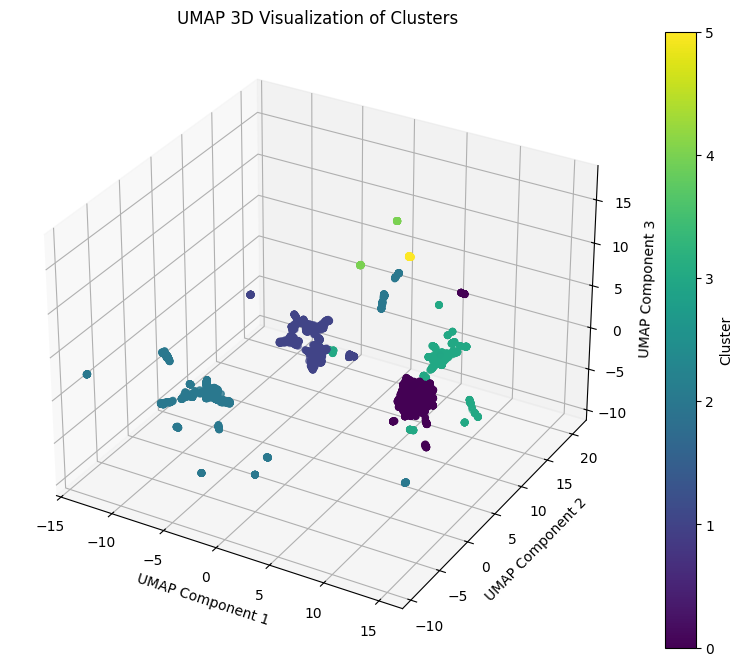

In [ ]:
#@title UMAP 3D

# Reduce dimensionality to 3D using UMAP
reducer = umap.UMAP(n_components=3, random_state=42)
embedding_3d = reducer.fit_transform(np.stack(df_filtered_clusters['combined_embedding']))

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(embedding_3d[:, 0], embedding_3d[:, 1], embedding_3d[:, 2], c=df_filtered_clusters['cluster'])

ax.set_xlabel('UMAP Component 1')
ax.set_ylabel('UMAP Component 2')
ax.set_zlabel('UMAP Component 3')
ax.set_title('UMAP 3D Visualization of Clusters')

# Add a colorbar
fig.colorbar(scatter, label='Cluster')
plt.show()


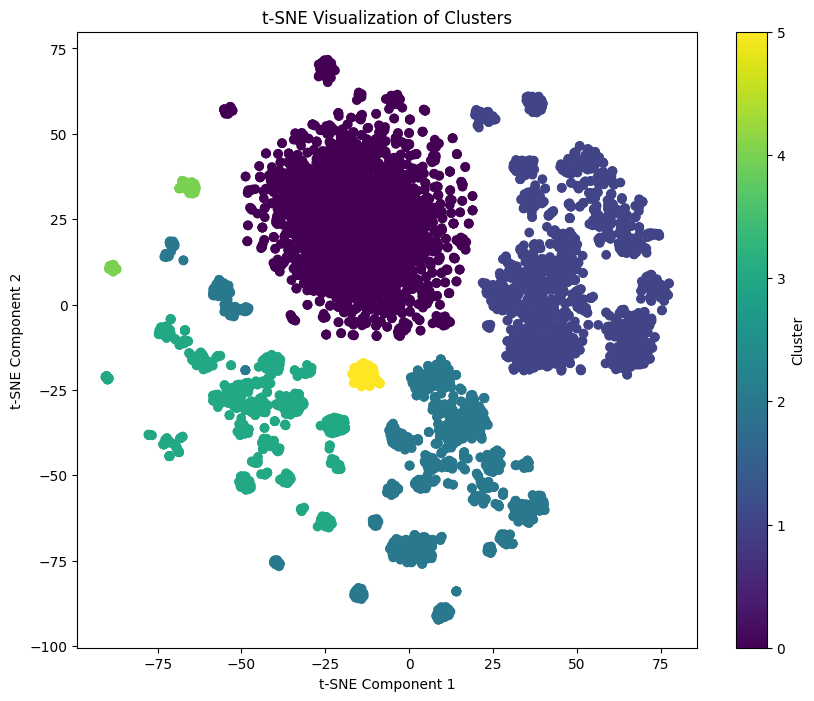

In [ ]:
#@title t-SNE 2D

# Use TSNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=0)
tsne_result = tsne.fit_transform(np.stack(df_filtered_clusters['combined_embedding']))

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=df_filtered_clusters['cluster'])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Clusters')
plt.colorbar(label='Cluster')
plt.show()


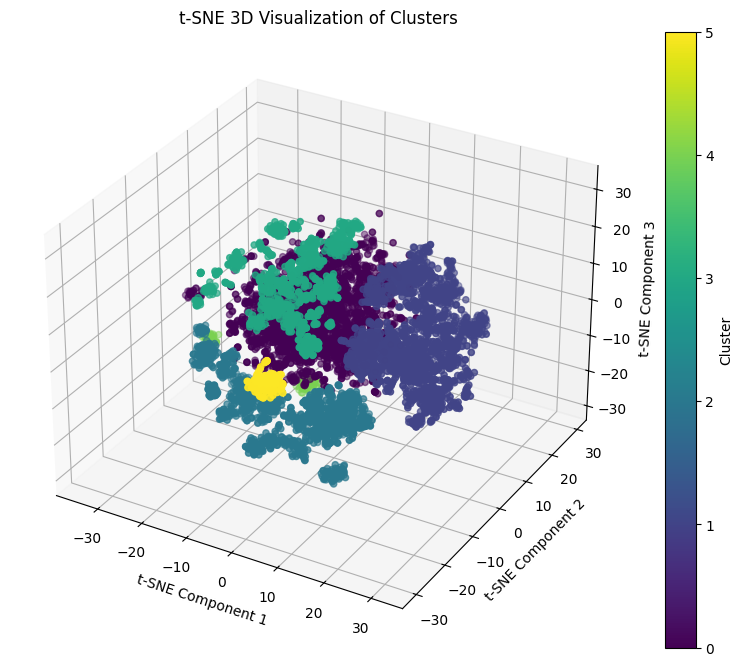

In [ ]:
#@title t-SNE 3D
# Use TSNE to reduce dimensionality to 3D
tsne = TSNE(n_components=3, random_state=0)
tsne_result = tsne.fit_transform(np.stack(df_filtered_clusters['combined_embedding']))

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(tsne_result[:, 0], tsne_result[:, 1], tsne_result[:, 2], c=df_filtered_clusters['cluster'])

ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.set_title('t-SNE 3D Visualization of Clusters')

# Add a colorbar
fig.colorbar(scatter, label='Cluster')
plt.show()


In [ ]:
#@title t-SNE 3D interativo

fig = px.scatter_3d(
    x=tsne_result[:, 0],
    y=tsne_result[:, 1],
    z=tsne_result[:, 2],
    color=df_filtered_clusters['cluster'],
    title='Interactive t-SNE 3D Visualization of Clusters',
    labels={'x': 't-SNE x', 'y': 't-SNE y', 'z': 't-SNE z', 'color': 'Cluster'}
)

fig.update_traces(marker=dict(size=7)) # Adjust marker size if needed
fig.show()


# 9 EXPORTAR PARA ANÁLISE LLM

In [ ]:
# prompt: conectar google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title Exportando...
"""
O arquivo aqui exportado contém contém as colunas do dataframe após pré-processamento,
inserção de novas colunas para tratamento dos códigos CDU,
limitação de pontos a partir da centróide de cada cluster e
o mais importante a coluna com a identificação de cluster
ESTE ARQUIVO CSV REFERE-SE SOMENTE A UMA CLASSE CDU previamente escolhida e tratada.
"""
# DEFINIR  ABAIXO LOCAL E NOME DO ARQUIVO A SER EXPORTADO, como no exemplo
df_filtered_clusters.to_csv('/content/drive/MyDrive/TCCpósCIN/df_uniqueBERT/df_filteredCluster_uniqueall-paraphrase-multilingual_2.csv', sep=';', encoding='utf-8', index=False)

In [2]:
!pip install --upgrade ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.0/214.0 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.3 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: jupyterlab_widgets
    Found existing installation: jupyterlab_widgets 3.0.13
    Uninstalling jupyterlab_widgets-3.0.13:
      Successfully uninstalled jupyterlab_widgets-3.0.13
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1
